In [19]:
from pathlib import Path
from typing import List

import numpy as np
import matplotlib.pyplot as plt

from kedro.extras.datasets.pickle import PickleDataSet
from kedro.config import ConfigLoader

from PIL import Image

import kornia.augmentation as K

import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision.utils import save_image

In [2]:
import os, sys
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../src/'))

from src.tagseg.data.acdc_dataset import AcdcDataSet
from src.tagseg.data.dmd_dataset import DmdDataSet, DmdTimeDataSet
from src.tagseg.data.scd_dataset import ScdDataSet
from src.tagseg.pipelines.data_processing.nodes import preprocess_acdc
from src.tagseg.pipelines.data_splitting.nodes import split_data

In [3]:
conf_paths = ["../conf/base", "../conf/local"]
conf_loader = ConfigLoader(conf_paths)
conf_catalog = conf_loader.get("catalog*", "catalog*/**")

In [25]:
path_in = Path('../../PyTorch-CycleGAN/datasets/taggedmr-v1/test/A')
path_out = Path('../../PyTorch-CycleGAN/output/B')

# input_imgs = list(sorted(filter(lambda p: p.suffix == '.png', path_in.iterdir()), key=lambda p: int(p.stem.split('_')[-1])))
# output_imgs = list(sorted(filter(lambda p: p.suffix == '.png', path_out.iterdir()), key=lambda p: int(p.stem.split('_')[-1])))

input_imgs = list(sorted(filter(lambda p: p.is_file(), path_in.iterdir()), key=lambda p: p.stem))
output_imgs = list(sorted(filter(lambda p: p.is_file(), path_out.iterdir()), key=lambda p: p.stem))

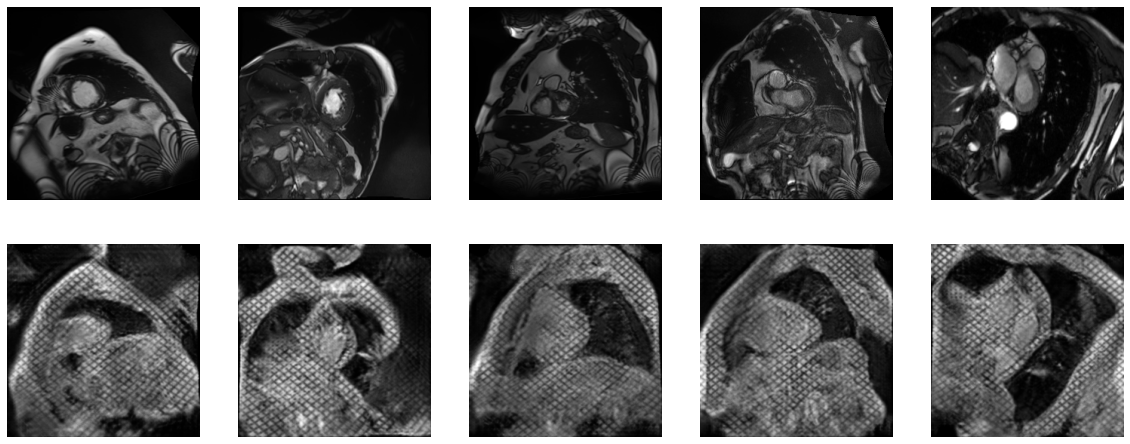

In [28]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i in range(15, 20):
    ax[0, i % 5].imshow(Image.open(input_imgs[i]).convert('L'), cmap='gray')
    ax[0, i % 5].axis('off')
    ax[1, i % 5].imshow(Image.open(output_imgs[i]).convert('L'), cmap='gray')
    ax[1, i % 5].axis('off')